In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('Students_Grading_Dataset.csv')
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

df.groupby(['Age', 'Gender', 'Department'], sort=True).describe()

Attendance (%)                                        \
                                count       mean        std    min      25%   
Age Gender Department                                                         
18  Female Business              68.0  76.399642  13.913714  51.13  68.0750   
           CS                   124.0  72.992233  12.290691  50.36  63.1500   
           Engineering          102.0  76.380362  13.200192  50.64  66.0100   
           Mathematics           33.0  72.780862  11.984579  50.69  63.4300   
    Male   Business              60.0  76.498594  14.836305  50.86  64.7275   
           CS                   149.0  76.707304  13.058924  50.03  66.4800   
           Engineering          107.0  77.167008  14.043141  50.04  67.0950   
           Mathematics           39.0  77.721903  14.199710  51.91  70.8850   
19  Female Business              70.0  77.681733  14.736589  50.83  66.0475   
           CS                   150.0  74.399551  13.726289  50.28  64.7525   
           Engineering           82.0  74.102314  13.373129  50.70  64.7275   
           Mathematics           32.0  78.160489  12.008270  51.61  74.4300   
    Male   Business              93.0  73.847048  13.459317  50.77  62.0500   
           CS                   138.0  73.730320  13.140110  50.80  63.1650   
           Engineering          107.0  74.247582  13.564867  50.40  62.6750   
           Mathematics           33.0  75.561818  14.925305  51.54  62.3600   
20  Female Business              73.0  76.080938  14.140374  52.26  66.2800   
           CS                   135.0  76.248622  13.483516  50.51  64.6550   
           Engineering           97.0  74.941956  12.629909  50.20  65.7400   
           Mathematics           34.0  75.685249  12.648764  50.49  67.4275   
    Male   Business              67.0  73.725350  13.717247  51.05  62.9800   
           CS                   130.0  72.866020  13.901333  50.07  61.3550   
           Engineering          101.0  76.361172  13.092825  50.68  68.2100   
           Mathematics           34.0  78.160754  14.153169  50.30  70.0700   
21  Female Business              79.0  74.059818  12.894536  51.01  64.1100   
           CS                   137.0  75.650092  13.565507  50.70  64.8800   
           Engineering          102.0  76.698905  13.881043  50.93  67.3225   
           Mathematics           32.0  77.316827  12.314605  50.46  72.8850   
    Male   Business              85.0  72.618182  13.493047  50.32  61.0300   
           CS                   140.0  74.744580  13.294900  50.38  63.8925   
           Engineering          130.0  76.022415  12.548450  50.05  66.5975   
           Mathematics           48.0  73.761456  15.635186  50.18  60.3300   
22  Female Business              60.0  76.168308  13.179308  50.65  66.8725   
           CS                   164.0  75.185364  13.903905  50.22  63.7800   
           Engineering          108.0  76.816176  13.524778  50.14  66.3750   
           Mathematics           33.0  75.230995  12.287221  56.95  64.3900   
    Male   Business              61.0  74.808686  12.830864  52.17  64.6500   
           CS                   158.0  75.710541  14.450908  50.06  64.6375   
           Engineering          107.0  76.392294  13.117918  50.01  68.8000   
           Mathematics           41.0  75.731879  13.335418  50.93  66.2500   
23  Female Business              76.0  77.714754  12.632483  51.56  68.8825   
           CS                   158.0  75.500839  13.162392  51.71  65.4425   
           Engineering          118.0  76.185253  14.440747  50.49  62.4500   
           Mathematics           40.0  73.138426  14.202231  50.66  62.0325   
    Male   Business              57.0  77.211325  12.997475  54.27  69.0700   
           CS                   155.0  75.327527  14.268825  50.17  65.1050   
           Engineering          100.0  75.966199  14.833315  50.16  61.6750   
           Mathematics           30.0  74.663568  13.951121  50.59  63.40

In [2]:
df.pivot_table(values=['Midterm_Score', 'Final_Score'], index=['Age'], columns='Department', aggfunc='mean', margins=True)

Final_Score                                                \
Department    Business         CS Engineering Mathematics        All   
Age                                                                    
18           70.452031  68.660806   69.535407   71.715972  69.587551   
19           70.076933  70.397222   69.213386   67.779692  69.764468   
20           71.604429  68.794340   72.937980   66.362794  70.356945   
21           69.657805  70.430975   70.696293   69.867250  70.284436   
22           67.880909  68.273416   71.292512   67.529865  69.020123   
23           71.153985  68.872364   70.730780   68.075286  69.761730   
24           69.160573  68.260810   68.174038   71.287432  68.741010   
All          70.004155  69.083007   70.377733   69.004036  69.640788   

           Midterm_Score                                                
Department      Business         CS Engineering Mathematics        All  
Age                                                                     
18             69.631797  69.995824   72.487560   70.979583  70.794956  
19             69.019264  68.869722   70.846931   72.009385  69.723830  
20             71.127071  71.864679   68.169747   66.079265  70.034173  
21             70.875000  70.083971   69.969612   70.479750  70.263068  
22             67.104793  70.995000   70.526326   69.933784  70.107008  
23             69.671955  71.000767   69.715963   75.435857  70.801362  
24             69.878408  70.291162   71.987548   68.948649  70.552158  
All            69.683161  70.448595   70.527692   70.538211  70.326844

In [3]:
pd.crosstab(df['Gender'], df['Department'], normalize=True)

Department,Business,CS,Engineering,Mathematics
Gender,,,,
Female,0.0980,0.2010,0.1410,0.0498
Male,0.1032,0.2034,0.1528,0.0508


In [4]:
numeric = df.select_dtypes('number').columns
shapiro_test_res = []

for i in numeric:
    shapiro_test = stats.shapiro(df[i])
    shapiro_test_res.append(shapiro_test)

print(shapiro_test_res)

[ShapiroResult(statistic=np.float64(0.9191895922585046), pvalue=np.float64(1.0810411565966776e-45)), ShapiroResult(statistic=np.float64(0.9680218547931629), pvalue=np.float64(5.85168911970807e-32)), ShapiroResult(statistic=np.float64(0.956949047153719), pvalue=np.float64(4.373612435881249e-36)), ShapiroResult(statistic=np.float64(0.955133084482087), pvalue=np.float64(1.1134199976607749e-36)), ShapiroResult(statistic=np.float64(0.9666316241918663), pvalue=np.float64(1.5587656751320972e-32)), ShapiroResult(statistic=np.float64(0.954295312416597), pvalue=np.float64(6.011161156514829e-37)), ShapiroResult(statistic=np.float64(0.9536882870276187), pvalue=np.float64(3.867382334119578e-37)), ShapiroResult(statistic=np.float64(0.9542708257239936), pvalue=np.float64(5.9046312688244314e-37)), ShapiroResult(statistic=np.float64(0.9557300977233065), pvalue=np.float64(1.7372450365530298e-36)), ShapiroResult(statistic=np.float64(0.9525004303489796), pvalue=np.float64(1.653130838462009e-37)), ShapiroR

In [5]:
anderson_test_res = []

for i in numeric:
    anderson_test = stats.anderson(df[i])
    anderson_test_res.append(anderson_test)

print(anderson_test_res)

[AndersonResult(statistic=np.float64(116.26153551116477), critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(21.0484), scale=np.float64(1.9897862422526467))
 success: True
 message: '`anderson` successfully fit the distribution to the data.'), AndersonResult(statistic=np.float64(33.50886680635813), critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(75.431409455843), scale=np.float64(13.61048103548332))
 success: True
 message: '`anderson` successfully fit the distribution to the data.'), AndersonResult(statistic=np.float64(51.73556131474015), critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(70.326844), scale=np.float64(17.213208523375233))
 success: T

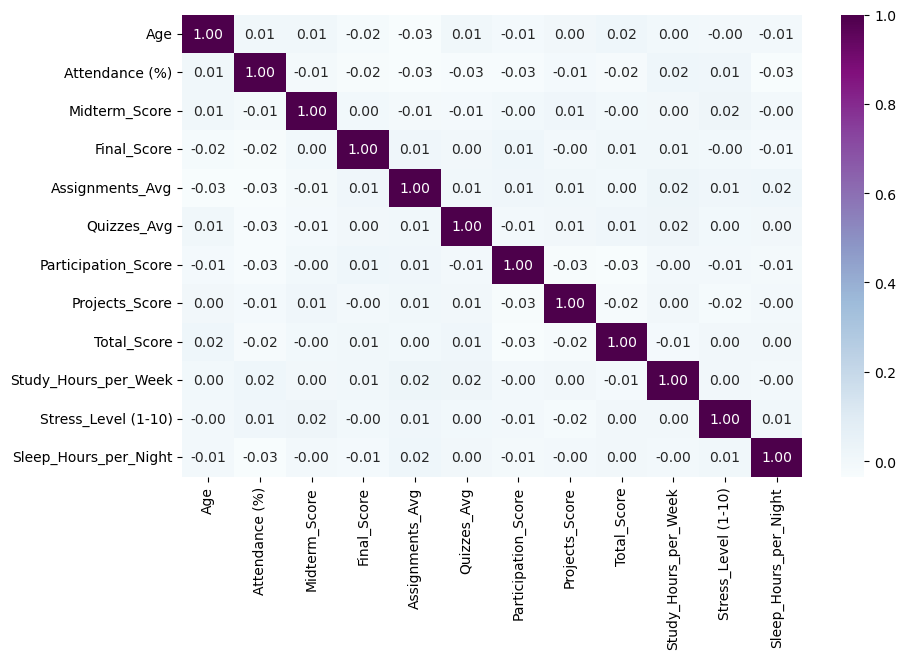

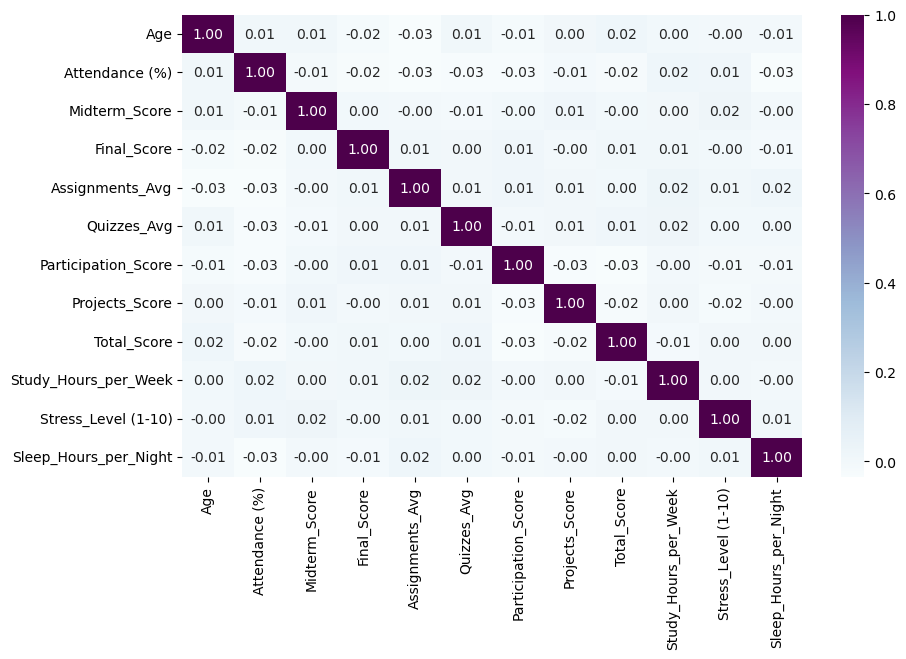

In [6]:
corr_matrix_pearson = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_pearson, annot=True, cmap="BuPu", fmt=".2f")

corr_matrix_spearman = df.corr(numeric_only=True, method='spearman')
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_spearman, annot=True, cmap="BuPu", fmt=".2f")

plt.show()

In [7]:
numeric = df.select_dtypes('number').columns
df_scaled = preprocessing.StandardScaler().fit_transform(df[numeric])

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric
vif_data["VIF"] = [variance_inflation_factor(df_scaled, i) for i in range(df[numeric].shape[1])]

print(vif_data)

                  Feature       VIF
0                     Age  1.001931
1          Attendance (%)  1.005506
2           Midterm_Score  1.000915
3             Final_Score  1.001475
4         Assignments_Avg  1.003397
5             Quizzes_Avg  1.001671
6     Participation_Score  1.003399
7          Projects_Score  1.001784
8             Total_Score  1.002649
9    Study_Hours_per_Week  1.001507
10    Stress_Level (1-10)  1.001063
11  Sleep_Hours_per_Night  1.001871


In [8]:
df_encoded = df.copy()
scale_mapper = {"F":0, "E":1, "D":2, "C":3, "B":4, "A":5}
df_encoded['Grade'].replace(scale_mapper)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16888\2796094093.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Grade'].replace(scale_mapper)


0       0
1       5
2       2
3       5
4       0
       ..
4995    2
4996    3
4997    5
4998    5
4999    0
Name: Grade, Length: 5000, dtype: int64